 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Read the daily closing prices of Whale returns, set the `date` as a datetime index

whale_returns = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)

whale_df = whale_df.sort_index()
## concat across columns
pd.concat([whale_df], axis="columns", join="inner")
whale_df
### risk analysis. 
### risk free return of zero for sharpe ration
####use portfolio planner code

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
algo_returns = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df = algo_df.sort_index()
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [4]:
sp_returns = Path("Resources/sp_tsx_history.csv")
sp_df = pd.read_csv(sp_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_df = sp_df.sort_index()
sp_df


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [5]:
# Reading whale returns
whale_df.shape
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [6]:
# Count nulls
whale_df.isnull().sum().sum()


4

In [7]:
# Drop nulls
whale_df.isnull().sum().sum()
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum().sum()

0

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns

algo_df.shape
algo_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [9]:
# Count nulls
algo_df.isnull().sum().sum()



6

In [10]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum().sum()

0

In [11]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P TSX 60 Closing Prices
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
# Check Data Types
sp_df.shape

sp_df.info()




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [14]:
# Fix Data 

#sp_df = sp_df.replace({r'\$':''}, regex = True)
sp_df["Close"] = sp_df["Close"].str.replace("$","")
sp_df["Close"] = sp_df["Close"].str.replace(",","")
sp_df["Close"] = sp_df["Close"].astype("float")

#sp_df.shape
#sp_df.info()
#sp_df.head()
sp_df.dtypes


C:\Users\Lachie\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Close    float64
dtype: object

In [15]:
((sp_df.iloc[902 ,: ]  - sp_df.iloc[901 ,: ]) / sp_df.iloc[901 ,: ] ) * 100

Close    0.007409
dtype: float64

In [16]:
# Calculate Daily Returns

sp_returns = sp_df.pct_change().dropna().copy()
sp_returns.head()
#sp_max = max(sp_returns["Close"])
#print(sp_max)
#counter = 0
#for i in sp_returns["Close"]:
    #counter += 1
    #if sp_max == i:
        #print(counter)

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [17]:
sp_returns = sp_returns.rename(columns = {"Close":"SP60"})
sp_returns.head()


,SP60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

group_ret = pd.concat([whale_df, algo_df, sp_returns], axis="columns", join="inner")
group_ret= group_ret.sort_index()

group_ret.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

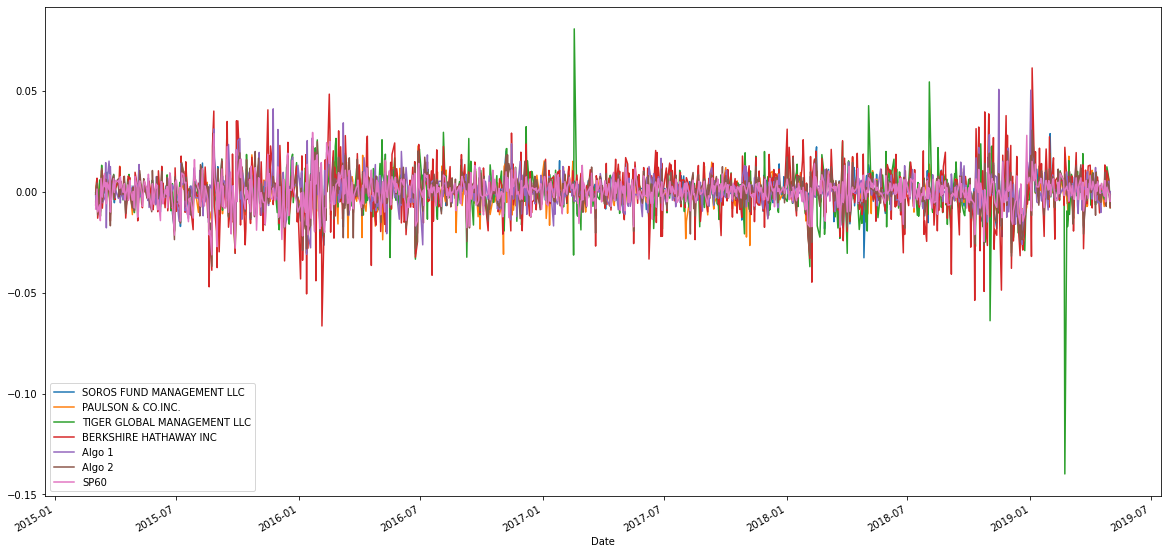

In [19]:
# Plot daily returns of all portfolios
group_ret.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

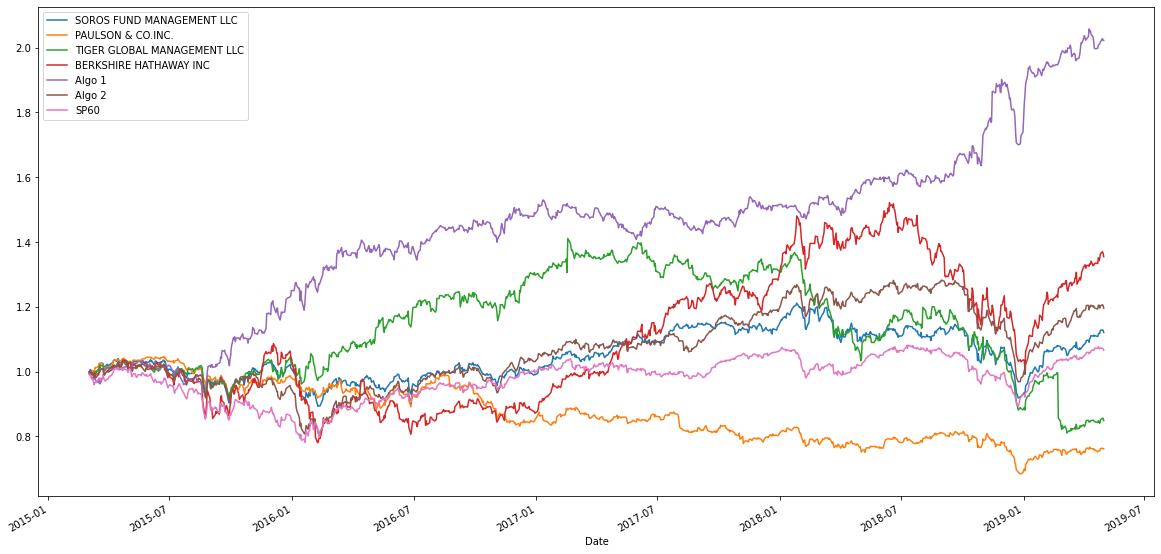

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + group_ret).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

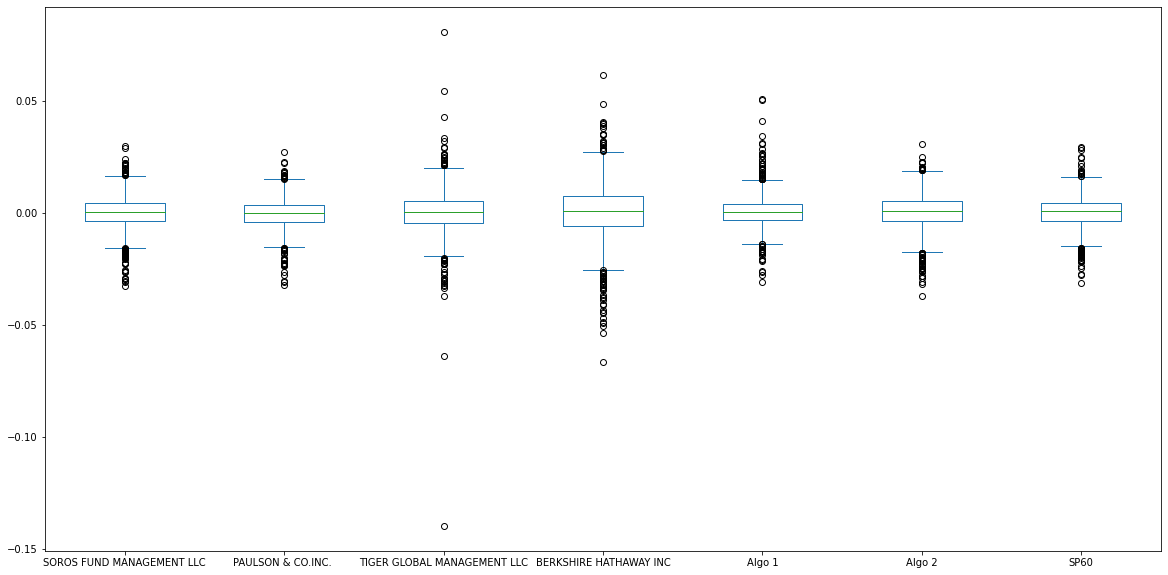

In [21]:
# Box plot to visually show risk

group_ret.plot.box(figsize = (20,10))


### Calculate Standard Deviations

In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y label')

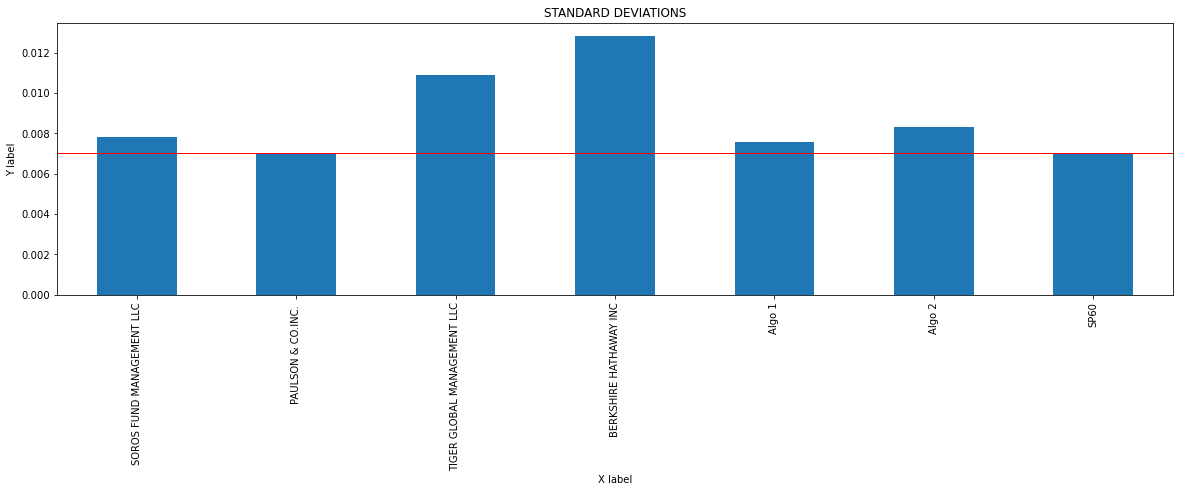

In [23]:
# Calculate the daily standard deviations of all portfolios
group_ret.std().plot(kind = "bar",figsize = (20,5))

plt.axhline(y=0.007036, linewidth=1, color='r')
plt.title("STANDARD DEVIATIONS")
plt.xlabel("X label")
plt.ylabel("Y label")

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
group_ret.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP60                           0.007034
dtype: float64

In [25]:
# Calculate  the daily standard deviation of S&P TSX 60



# Determine which portfolios are riskier than the S&P TSX 60

#EVERY PORTFOLIO BESIDES PAULSON AND CO IS RISKIER THAN THE S&P 60


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days
annual_sd = group_ret.std() * 252
print(annual_sd)

SOROS FUND MANAGEMENT LLC      1.972549
PAULSON & CO.INC.              1.759545
TIGER GLOBAL MANAGEMENT LLC    2.742462
BERKSHIRE HATHAWAY INC         3.232030
Algo 1                         1.912399
Algo 2                         2.098243
SP60                           1.772597
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

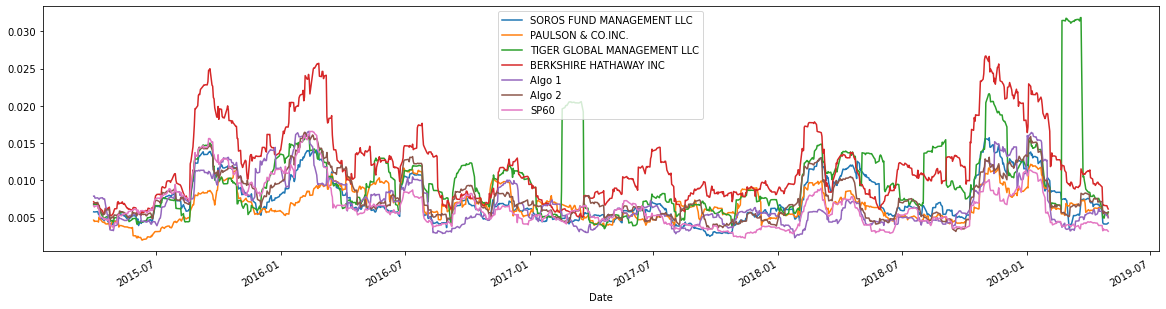

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_sd = group_ret.rolling(window=21).std


group_ret.rolling(window=21).std().plot(figsize = (20,5))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [28]:
# Calculate the correlation
correlation = group_ret.corr()

# Display de correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673946
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486542
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440602
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557256
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310272
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737371
SP60,0.673946,0.486542,0.440602,0.557256,0.310272,0.737371,1.000000


<AxesSubplot:>

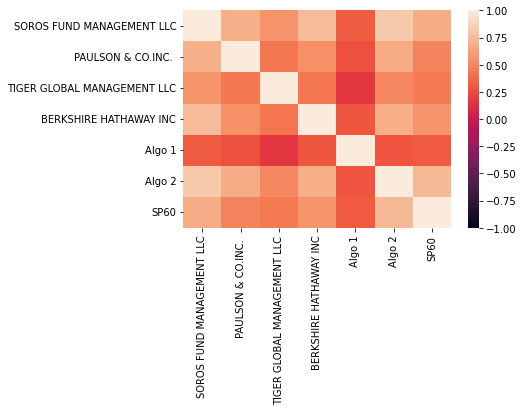

In [29]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [30]:
# Calculate covariance of a single portfolio


soros_covariance = group_ret['SOROS FUND MANAGEMENT LLC'].cov(group_ret['SP60'])
algo1_covariance = group_ret['Algo 1'].cov(group_ret['SP60'])

print(f"Soros covariance:{soros_covariance}")
print(f"Algo1 covariance:{algo1_covariance}")

# Calculate variance of S&P TSX
variance = group_ret["SP60"].var()
print(f"S&P TSX variance: {variance}")

# Computing beta

soros_beta = soros_covariance / variance
algo1_beta = algo1_covariance / variance

print(f"Soros beta:{soros_beta}")
print(f"Algo1 beta:{algo1_beta}")



Soros covariance:3.71075448281253e-05
Algo1 covariance:1.6562636057359246e-05
S&P TSX variance: 4.947879575555063e-05
Soros beta:0.7499686332596828
Algo1 beta:0.3347421012262857


In [31]:
# Plot beta trend

rolling_soros_covariance = group_ret['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(group_ret['SP60'])
rolling_algo1_covariance = group_ret['Algo 1'].rolling(window=30).cov(group_ret['SP60'])


rolling_variance = group_ret["SP60"].rolling(window=30).var()

# Calculate 30-day rolling beta

rolling_soros_beta = rolling_soros_covariance / rolling_variance
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance





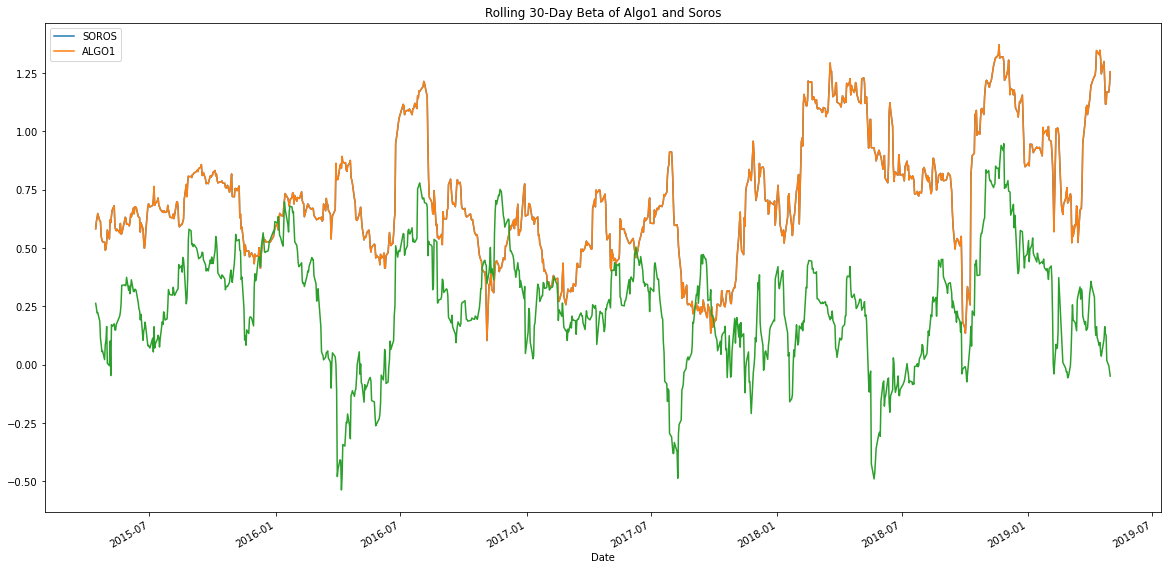

In [32]:
# Set the legend of the figure

ax = rolling_soros_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of Algo1 and Soros")
rolling_soros_beta.plot(ax=ax)
rolling_algo1_beta.plot(ax=ax)

ax.legend(["SOROS", "ALGO1"])


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

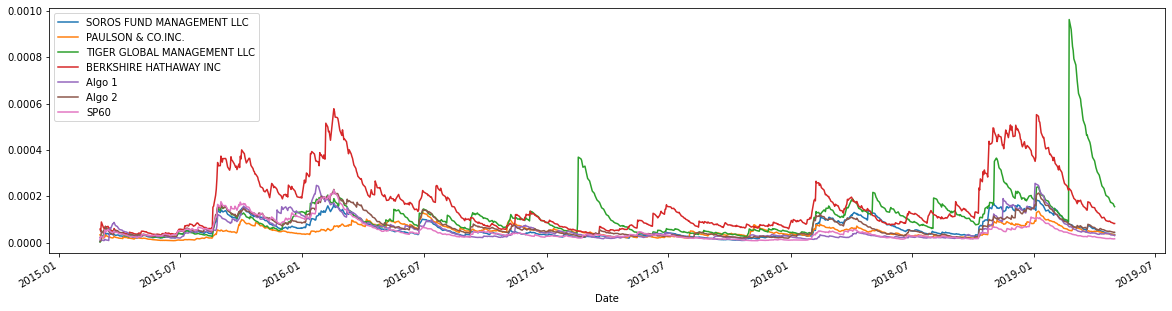

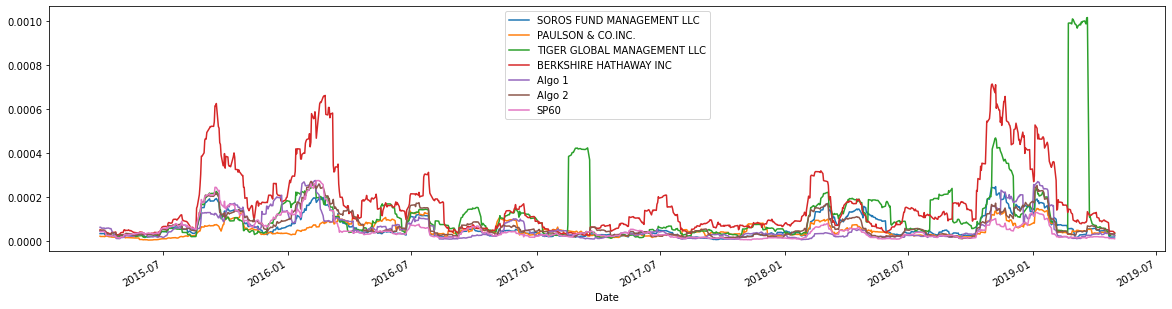

In [33]:
# Use `ewm` to calculate the rolling window
group_ret.ewm(21).var().plot(figsize = (20,5))
group_ret.rolling(window=21).var().plot(figsize = (20,5))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios
sharpe_ratios = (group_ret.mean()*252)/(group_ret.std() * np.sqrt(252))
print(sharpe_ratios)




SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP60                           0.195551
dtype: float64


Text(0, 0.5, 'Sharpe Ratio')

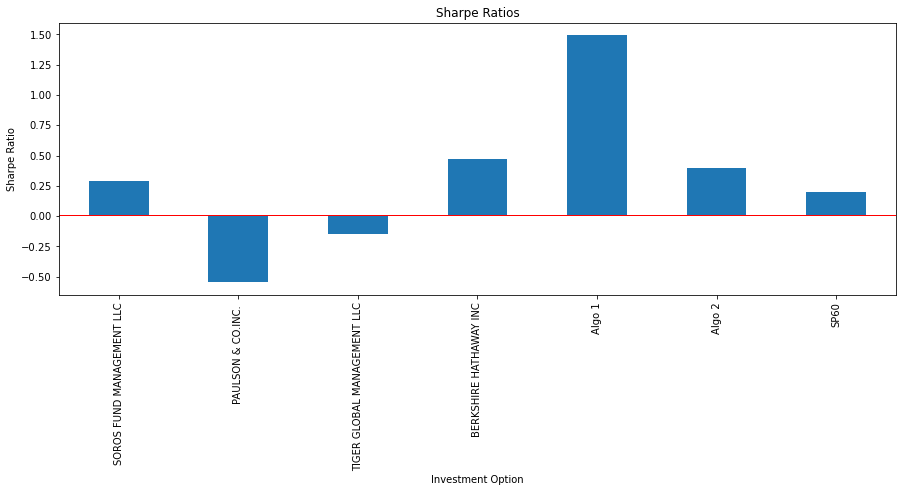

In [35]:
# Visualize the sharpe ratios as a bar plotprint
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
group_ret.std().plot(kind = "bar",figsize = (15,5))

plt.axhline(y=0.007036, linewidth=1, color='r')
plt.title("Sharpe Ratios")
plt.xlabel("Investment Option")
plt.ylabel("Sharpe Ratio")

In [36]:
group_ret.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                              

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [37]:
#The two Algo strategies outperform the s&p and all of the other whale portfolios with the exception of berkshire hathaway, which outperforms the market and all buy one algo. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [38]:
# Reading data from 1st stock
ford_returns = Path("Resources/ford.csv")
ford_df = pd.read_csv(ford_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
ford_df = ford_df.rename(columns={'Close': 'ford'})
ford_df.head()


,ford
Date,
2020-01-02,9.42
2020-01-03,9.21
2020-01-06,9.16
2020-01-07,9.25
2020-01-08,9.25


In [39]:
# Reading data from 2nd stock
anzusd_returns = Path("Resources/anzusd.csv")
anzusd_df = pd.read_csv(anzusd_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
anzusd_df = anzusd_df.rename(columns={'Close': 'anzusd'})
anzusd_df.head()

,anzusd,Unnamed: 2,Unnamed: 3
Date,,,
2020-01-02,17.230663,NaN,43862.0
2020-01-03,17.269206,NaN,NaN
2020-01-06,17.108491,NaN,NaN
2020-01-07,17.330769,NaN,NaN
2020-01-08,17.261541,NaN,NaN


In [40]:
# Reading data from 3rd stock
bmbl_returns = Path("Resources/bmbl.csv")
bmbl_df = pd.read_csv(bmbl_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
bmbl_df = bmbl_df.rename(columns={'Close': 'bmbl'})
bmbl_df.head()

,bmbl
Date,
2021-02-11,70.31
2021-02-12,75.46
2021-02-16,78.89
2021-02-17,77.32
2021-02-18,74.00


In [41]:
# Reading data from 4th stock
tesla_returns = Path("Resources/tesla.csv")
tesla_df = pd.read_csv(tesla_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
tesla_df = tesla_df.rename(columns={'Close': 'tesla'})
tesla_df.head()

,tesla
Date,
2020-01-02,86.05
2020-01-03,88.60
2020-01-06,90.31
2020-01-07,93.81
2020-01-08,98.43


In [42]:
# Combine all stocks in a single DataFrame


my_ret = pd.concat([ford_df, anzusd_df['anzusd'], bmbl_df, tesla_df], axis="columns", join="inner")
my_ret= my_ret.sort_index()

my_ret.head()

,ford,anzusd,bmbl,tesla
Date,,,,
2021-02-11,11.45,18.022849,70.31,811.66
2021-02-12,11.45,17.972162,75.46,816.12
2021-02-16,11.54,18.364125,78.89,796.22
2021-02-17,11.48,18.496932,77.32,798.15
2021-02-18,11.43,18.958824,74.00,787.38


In [43]:
my_ret_pctchange = my_ret.pct_change().dropna()
my_ret_pctchange.head()

,ford,anzusd,bmbl,tesla
Date,,,,
2021-02-12,0.000000,-0.002812,0.073247,0.005495
2021-02-16,0.007860,0.021809,0.045455,-0.024384
2021-02-17,-0.005199,0.007232,-0.019901,0.002424
2021-02-18,-0.004355,0.024971,-0.042938,-0.013494
2021-02-19,0.013123,-0.005263,-0.030405,-0.007722


<AxesSubplot:xlabel='Date'>

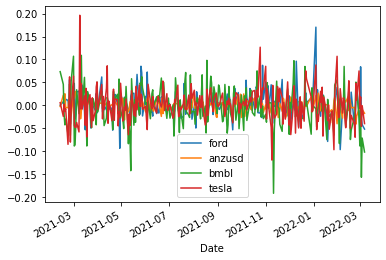

In [44]:
my_ret_pctchange.plot()

<AxesSubplot:>

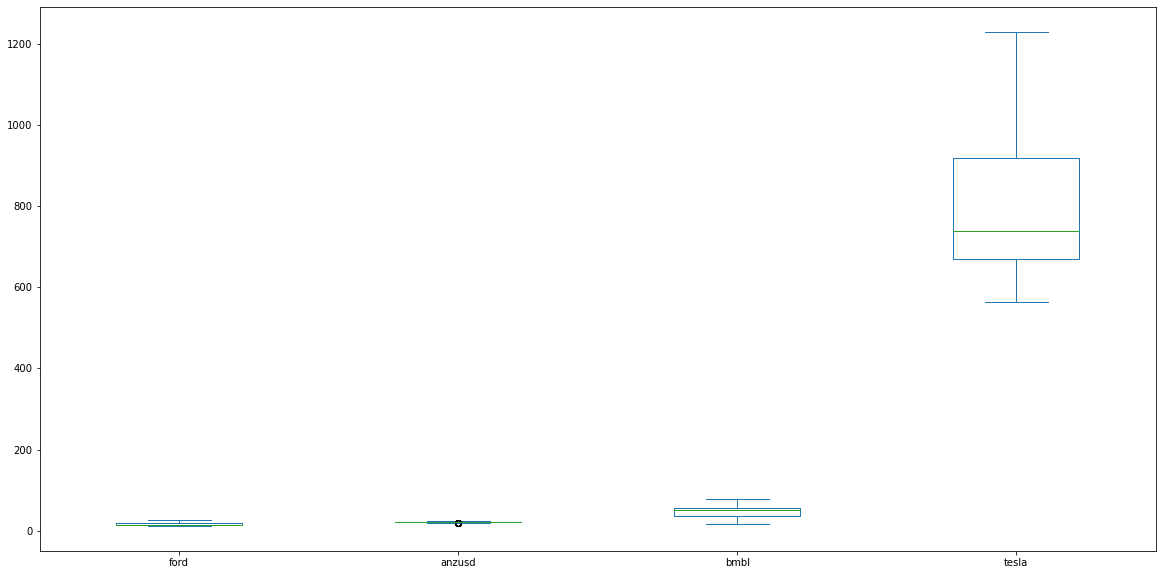

In [45]:
my_ret.plot.box(figsize = (20,10))


<AxesSubplot:xlabel='Date'>

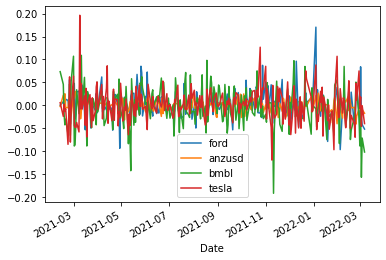

In [46]:
my_ret_pctchange.plot()

<AxesSubplot:xlabel='Date'>

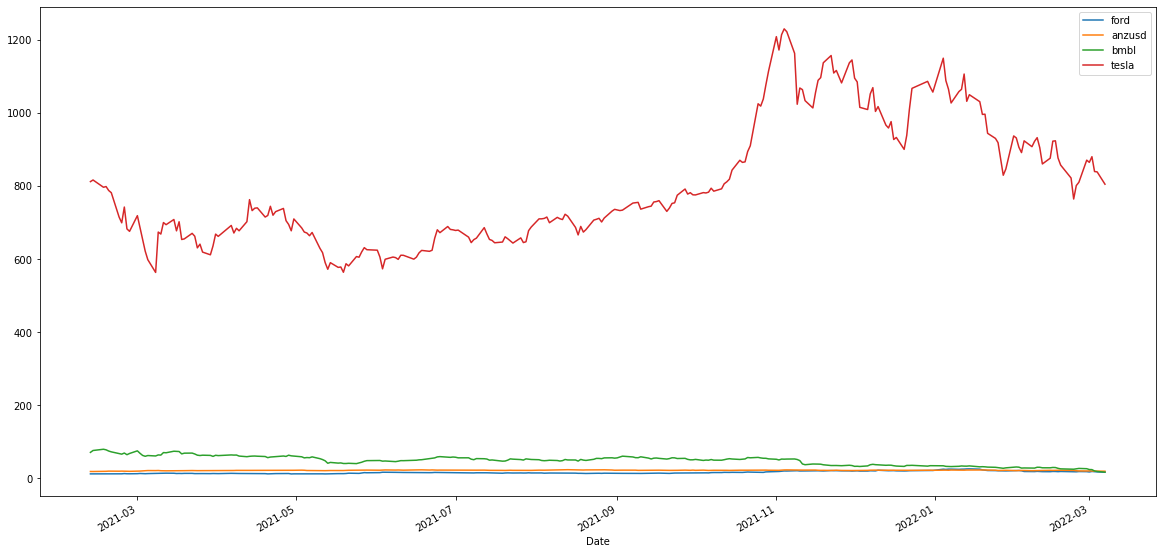

In [47]:
my_ret.plot(figsize=(20,10))

Text(0, 0.5, 'Y label')

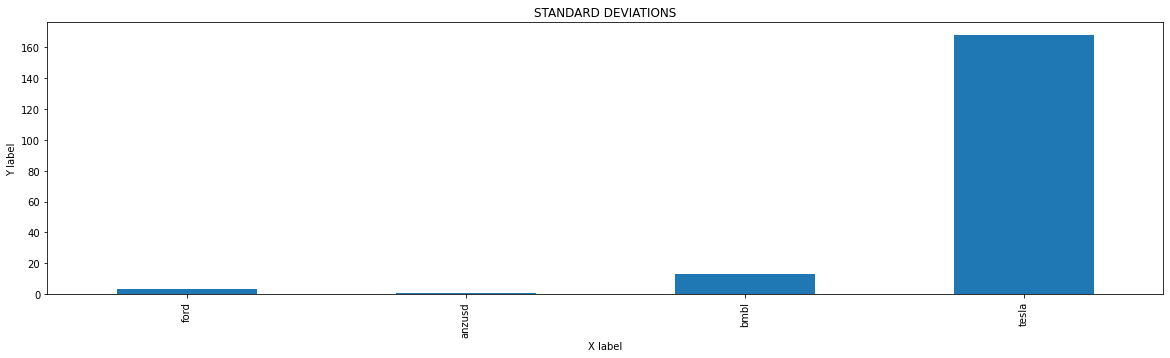

In [48]:


my_ret.std().plot(kind = "bar",figsize = (20,5))

plt.axhline(y=0.007036, linewidth=1, color='r')
plt.title("STANDARD DEVIATIONS")
plt.xlabel("X label")
plt.ylabel("Y label")

In [49]:
# Reorganize portfolio data by having a column per symbol

my_cumret = (1 + my_ret_pctchange).cumprod() -1
print(my_cumret)


                ford    anzusd      bmbl     tesla
Date                                              
2021-02-12  0.000000 -0.002812  0.073247  0.005495
2021-02-16  0.007860  0.018936  0.122031 -0.019023
2021-02-17  0.002620  0.026305  0.099701 -0.016645
2021-02-18 -0.001747  0.051933  0.052482 -0.029914
2021-02-19  0.011354  0.046396  0.020481 -0.037405
...              ...       ...       ...       ...
2022-03-01  0.458515  0.092051 -0.667899  0.064941
2022-03-02  0.580786  0.068999 -0.671171  0.084062
2022-03-03  0.537118  0.068246 -0.722941  0.034041
2022-03-04  0.471616  0.058305 -0.742853  0.032809
2022-03-07  0.394760  0.039597 -0.769165 -0.008723

[262 rows x 4 columns]


<AxesSubplot:xlabel='Date'>

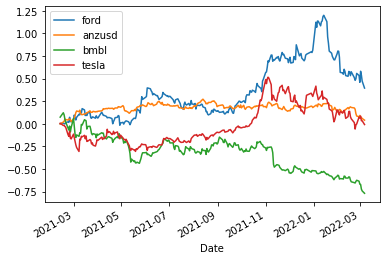

In [50]:
my_cumret.plot()


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

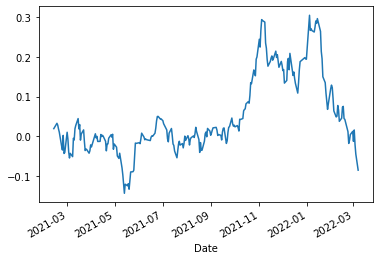

In [58]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return

prtf_ret = my_cumret.dot(weights)
prtf_ret.head()

# Display sample data
prtf_ret.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [62]:
# Join your returns DataFrame to the original returns DataFrame

comb_ret = pd.concat([group_ret, my_cumret], axis="columns", join="outer")
comb_ret= comb_ret.sort_index()
comb_ret.head()

comb_ret.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP60,ford,anzusd,bmbl,tesla
Date,,,,,,,,,,,


In [78]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

#there is no overlapping dates in the range that i have selected. And as a result it is impossible to compare them in the same period. 

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized `std`
volatility = comb_ret.std() * np.sqrt(252)
volatility


SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP60                           0.111663
ford                           4.710800
anzusd                         0.757510
bmbl                           2.898037
tesla                          3.289573
dtype: float64

In [65]:
volatility_my_cumret = my_cumret.std() *(252)
volatility_my_cumret


ford      74.781639
anzusd    12.025100
bmbl      46.004915
tesla     52.220356
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

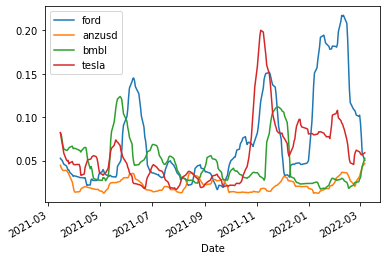

In [67]:
# Calculate rolling standard deviation

my_cumret_sma21 = my_cumret.rolling(window=21).std()

# Plot rolling standard deviation

my_cumret_sma21.plot()

### Calculate and plot the correlation

<AxesSubplot:>

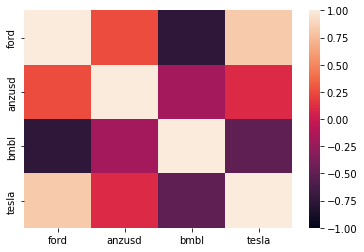

In [70]:
# Calculate and plot the correlation

correlation_my_cumret = my_cumret.corr()

import seaborn as sns
sns.heatmap(correlation_my_cumret, vmin=-1, vmax=1)


### How does your portfolio do?

Write your answer here!

In [ ]:
## My portfolio was difficult to compare on a like for like basis as the calculation period was different. But the weighting of bumble impacted my returns. I had a higher price variance, lower returns and a lower sharpe ratio. 